In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import matplotlib.gridspec as gridspec
import scipy.stats as stats

In [ ]:
import io
from google.colab import files
uploaded=files.upload()
sa=pd.read_csv(io.BytesIO(uploaded['SA.csv']))

Saving SA.csv to SA.csv


In [ ]:
sa.head()

,4,2183672871,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,Rawryn,FINDING NEMO!!!! HELL YEAH text me: 480.299.6988
0,4,2183672874,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,MaternalSpark,@glassidentities Yay! she's on twitter too..fo...
1,4,2183672928,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,stephensonmc,Over 500 followers! Thanks community
2,4,2183672820,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,ryanculling,Home from work. Start again at 8am. Epic.
3,4,2183672843,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,D_Roya,@robdyrdek that record was funny as hell
4,4,2183672929,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,xt1nam,@jram35 aww cute! don't forget to bring me bac...


In [ ]:
sa.columns=['target','ids','date','flag','user','text']
sa.sample(5)

,target,ids,date,flag,user,text
5575,0,1467904302,Mon Apr 06 22:44:34 PDT 2009,NO_QUERY,bsbnumber1fan,@nick_carter Aww Nick!! I like your hair longe...
8275,0,1972509406,Sat May 30 09:21:35 PDT 2009,NO_QUERY,camilleries,I'm getting really sad I'm leaving tomorrow I...
5305,4,2185600401,Mon Jun 15 17:37:31 PDT 2009,NO_QUERY,OctaviaFlaccus,i'll rip that scandalous bitch in TWO.
3094,4,2185077107,Mon Jun 15 16:51:03 PDT 2009,NO_QUERY,flowerlady2488,i love a good nap with anaya back to unpackin...
332,4,2183746750,Mon Jun 15 14:55:52 PDT 2009,NO_QUERY,shesaayupermana,I hope my GuardianAngel jogg wit me this morni...


In [ ]:
sa.head()

,target,ids,date,flag,user,text
0,4,2183672874,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,MaternalSpark,@glassidentities Yay! she's on twitter too..fo...
1,4,2183672928,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,stephensonmc,Over 500 followers! Thanks community
2,4,2183672820,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,ryanculling,Home from work. Start again at 8am. Epic.
3,4,2183672843,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,D_Roya,@robdyrdek that record was funny as hell
4,4,2183672929,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,xt1nam,@jram35 aww cute! don't forget to bring me bac...


In [ ]:
print('length of data is', len(sa))

length of data is 9031


In [ ]:
sa.shape

(17354, 6)

In [ ]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9031 entries, 0 to 9030
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  9031 non-null   int64 
 1   ids     9031 non-null   int64 
 2   date    9031 non-null   object
 3   flag    9031 non-null   object
 4   user    9031 non-null   object
 5   text    9031 non-null   object
dtypes: int64(2), object(4)
memory usage: 423.5+ KB


In [ ]:
sa.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [ ]:
np.sum(sa.isnull().any(axis=1))

0

In [ ]:
print('Count of columns in the data is:  ', len(sa.columns))
print('Count of rows in the data is:  ', len(sa))

Count of columns in the data is:   6
Count of rows in the data is:   17354


In [ ]:
sa['target'].unique()

array([4, 0])

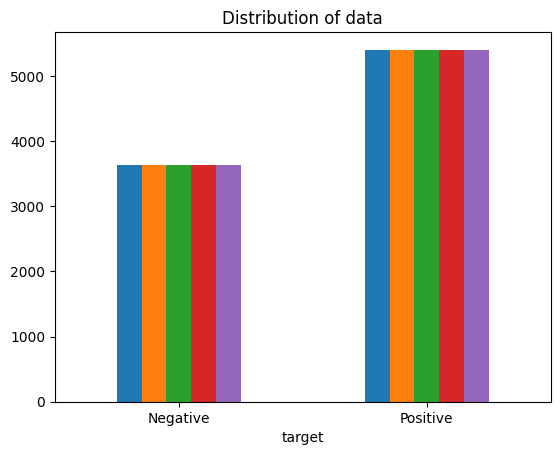

In [ ]:
# Plotting the distribution for dataset.
ax = sa.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(sa['text']), list(sa['target'])

<Axes: xlabel='target', ylabel='count'>

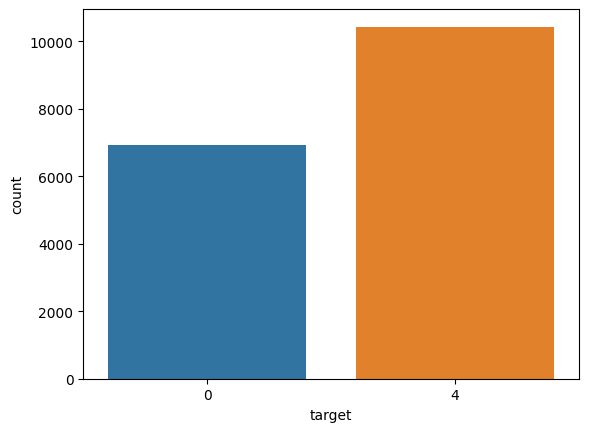

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=sa)
# 4: Positive, 0: Negative

In [ ]:
data=sa[['text','target']]

In [ ]:
data['target'] = data['target'].replace(4,1)

<ipython-input-10-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [ ]:
data['target'].unique()

array([1, 0])

In [ ]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [ ]:
dataset = pd.concat([data_pos, data_neg])

In [ ]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

9026    @deanw_124 oh, it kinda sucks that i don't get...
9027    @hthrflynn oh dear !!!!!  thoughts to you both...
9028          @walgman at least they're not rangers fans 
9029    i hate revision. but... there is no but. i jus...
9030     bored! watchin dragonsden and wishin i was rich 
Name: text, dtype: object

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0    @glassidentities yay! she's twitter too..follo...
1                 over 500 followers! thanks community
2                          home work. start 8am. epic.
3                         @robdyrdek record funny hell
4    @jram35 aww cute! don't forget bring back geor...
Name: text, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

9026            deanw124 oh kinda sucks dont get see face
9027    hthrflynn oh dear  thoughts physically amp emo...
9028                walgman least theyre not rangers fans
9029     hate revision but no but hate revision no upside
9030                 bored watchin dragonsden wishin rich
Name: text, dtype: object

In [ ]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

9026             dean124 oh kinda sucks dont get see face
9027    hthrflynn oh dear  thoughts physically amp emo...
9028                walgman least theyre not rangers fans
9029     hate revision but no but hate revision no upside
9030                 bored watchin dragonsden wishin rich
Name: text, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

0    [w, w]
1       [w]
2       [w]
3        []
4      [ww]
Name: text, dtype: object

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

0    [w, w]
1       [w]
2       [w]
3        []
4      [ww]
Name: text, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

0    [w, w]
1       [w]
2       [w]
3        []
4      [ww]
Name: text, dtype: object

In [ ]:
X=data.text
y=data.target

In [ ]:
# The SVC Class from Sklearn
#from sklearn import svm
#svm.SVC(kernel='rbf')
#svm.SVC(C=1.0,kernel='rbf',degree=3,gamma='scale',coef0=0.0,shrinking=True,probability=False,tol=0.001,cache_size=200,class_weight=None,verbose=False,max_iter=- 1,decision_function_shape='ovr', break_ties=False,  random_state=None)

SVC()

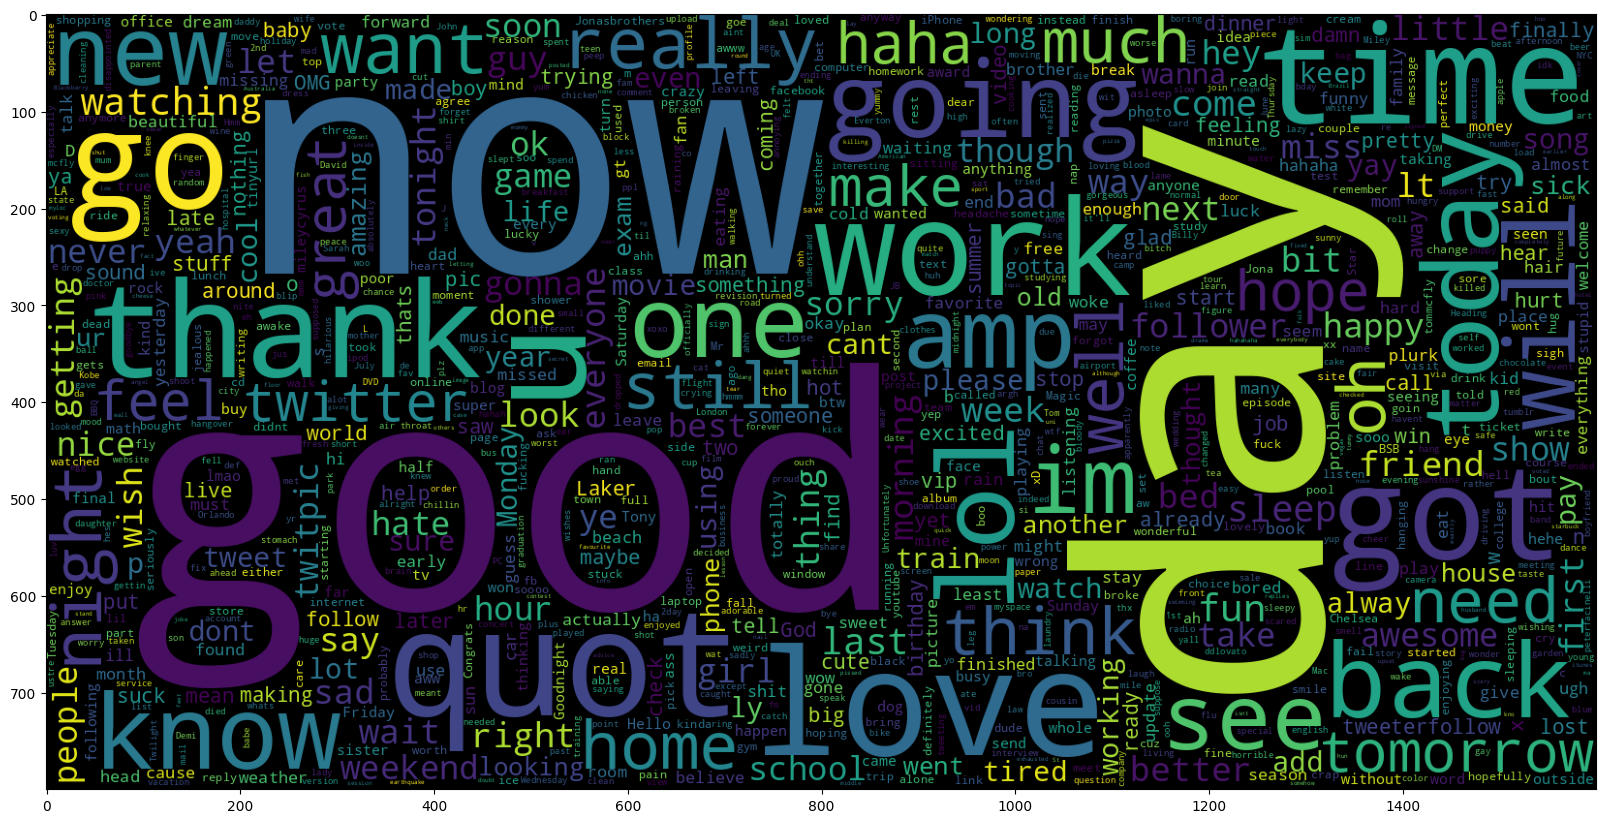

In [ ]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

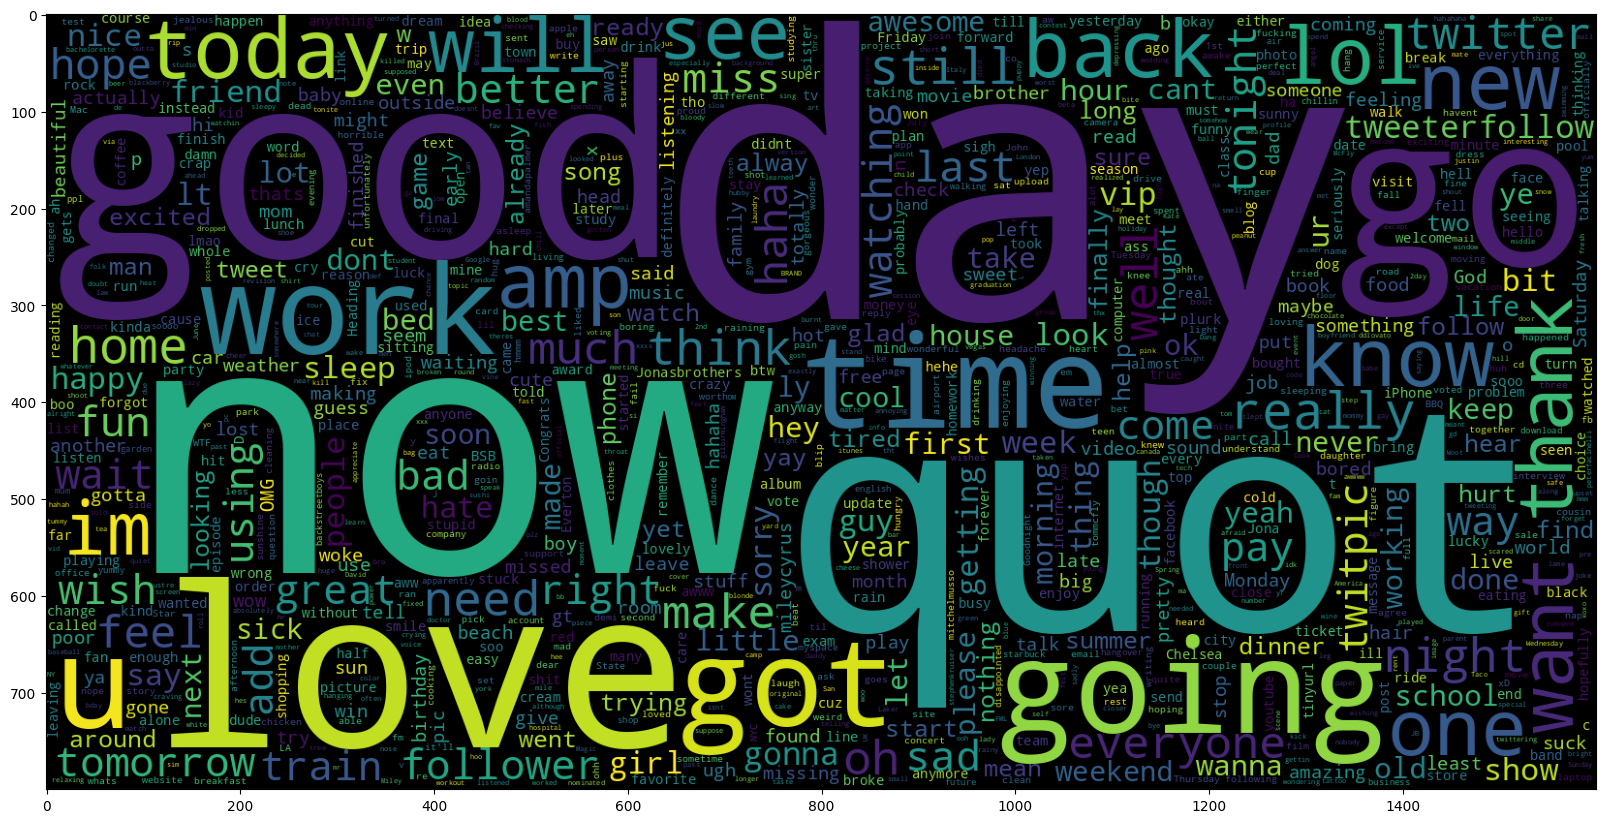

In [ ]:
data_pos = data['text'][800:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state =26105111)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # notice the spelling with the f before Vectorizer
from sklearn.naive_bayes import MultinomialNB # notice the Caps on the M
from sklearn.pipeline import make_pipeline

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
#print('No. of feature_words: ', len(vectoriser.get_feature_names()))


TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier_df = SVC(kernel = 'linear' , random_state = 0)
classifier_df.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
#predicting test data result
Y_pred = classifier_df.predict(X_test)

In [ ]:
acc = accuracy_score(y_test,Y_pred) *100
print("Accuracy for our dataset in predicting test data is : {:.2f}%".format(acc))

Accuracy for our dataset in predicting test data is : 78.82%


In [ ]:
#applying Gridsearchcv to find the best model
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100], 'kernel': ['linear']}]
grid_search = GridSearchCV(estimator= classifier_df,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
accuracy = grid_search.best_score_ *100

In [ ]:
print("Accuracy for our dataset with tuning is : {:.2f}%".format(accuracy))

Accuracy for our dataset with tuning is : 77.44%


In [ ]:
review = """SUPERB, I AM IN LOVE IN THIS PHONE"""
review_vector = vectoriser.transform([review]) # vectorizing
print(classifier_df.predict(review_vector))

[1]


In [ ]:
review = """Do not purchase this product. My cell phone blast when I switched the charger"""
review_vector = vectoriser.transform([review]) # vectorizing
print(classifier_df.predict(review_vector))

[0]


In [ ]:
review = """It's not even 5 days since i purchased this product.
I would say this a specially blended worst Phone in all formats.
ISSUE 1:
Have you ever heard of phone which gets drained even in standby mode during night?
Kindly please see the screenshot if you want to believe my statement.
My phone was in full charge at night 10:07 PM . I took this screenshot and went to sleep.
Then I woke up at morning and 6:35 AM and battery got drained by 56% in just standby condition.
If this is the case consider how many hours it will work, during day time.
It's not even 5 hours the battery is able to withstand.
ISSUE 2:
Apart from the battery, the next issue is the heating issue .I purchased a iron box recently from Bajaj in this sale.
But I realized this phone acts a very good Iron box than the Bajaj Iron box. I am using only my headphones to get connected in the call. I am not sure when this phone is will get busted due to this heating issue. It is definitely a challenge to hold this phone for even 1 minute. The heat that the phone is causing will definitely burn your hands and for man if you keep this phone in your pant pocket easily this will lead to infertility for you. Kindly please be aware about that.
Issue 3:
Even some unknown brands has a better touch sensitivity. The touch sensitivity is pathetic, if perform some operation it will easily take 1-2 minutes for the phone to response.
For your kind information my system has 73% of Memory free and the RAM is also 56% free.
Kindly please make this Review famous and lets make everyone aware of this issue with this phone.
Let's save people from buying this phone. There are people who don't even know what to do if this issue happens after 10 days from the date of purchase. So I feel at least this review will help people from purchasing this product in mere future."""
review_vector = vectoriser.transform([review]) # vectorizing
print(grid_search.predict(review_vector))

[0]


In [ ]:
review="""I got the product with all the latest features at a cheaper price compared to other similar kinds
of products available in the market but the look was a little old fashioned"""
review_vector = vectoriser.transform([review]) # vectorizing
print(grid_search.predict(review_vector))

[1]


In [ ]:
review=""" Im willing to pay more if they add gps and cellular connectivity. Xiaomi pad 5 owner."""
review_vector = vectoriser.transform([review]) # vectorizing
print(classifier_df.predict(review_vector))

[1]


In [ ]:
review=""" Nothing on the specs page. But why spend for something with passable chipset that doesn't have cellular connectivity and expandable storage?"""
review_vector = vectoriser.transform([review]) # vectorizing
print(classifier_df.predict(review_vector))

[0]


In [ ]:
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       0.90      0.17      0.29       557
           1       0.63      0.99      0.77       798

    accuracy                           0.65      1355
   macro avg       0.76      0.58      0.53      1355
weighted avg       0.74      0.65      0.57      1355



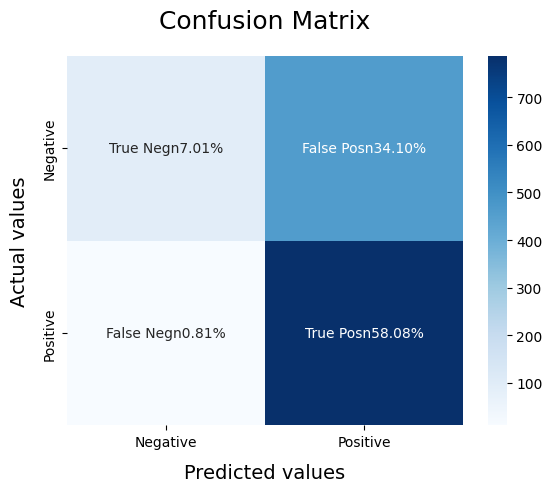

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

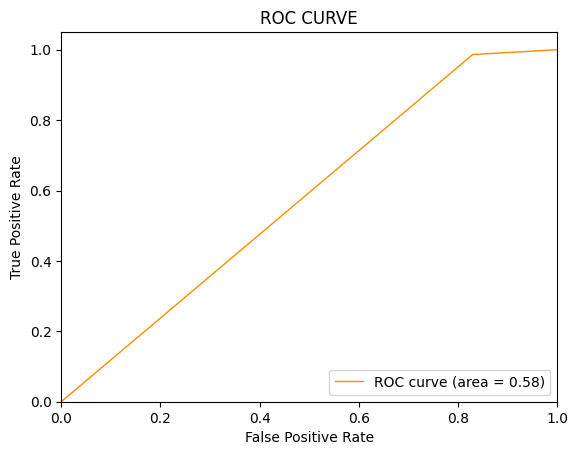

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       192
           1       0.77      0.85      0.81       260

    accuracy                           0.77       452
   macro avg       0.76      0.75      0.75       452
weighted avg       0.76      0.77      0.76       452



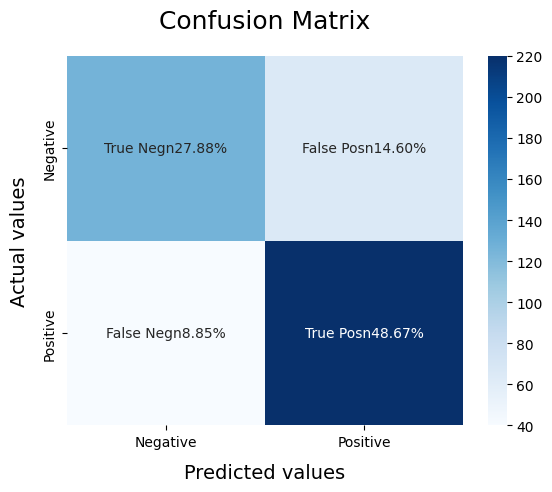

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

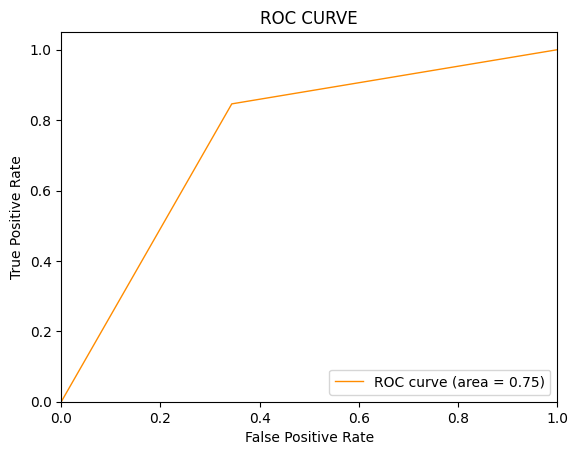

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.59      0.67       192
           1       0.74      0.87      0.80       260

    accuracy                           0.75       452
   macro avg       0.75      0.73      0.73       452
weighted avg       0.75      0.75      0.74       452



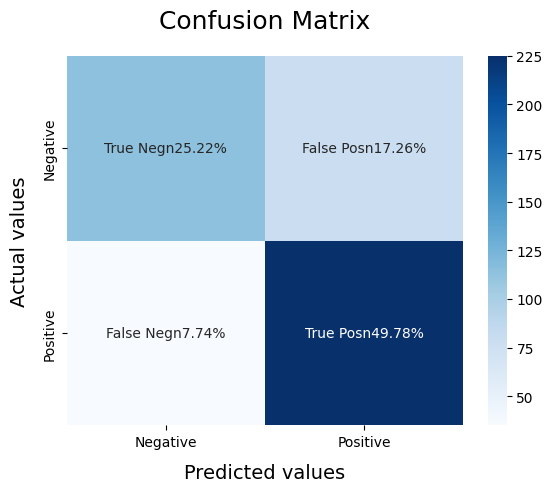

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

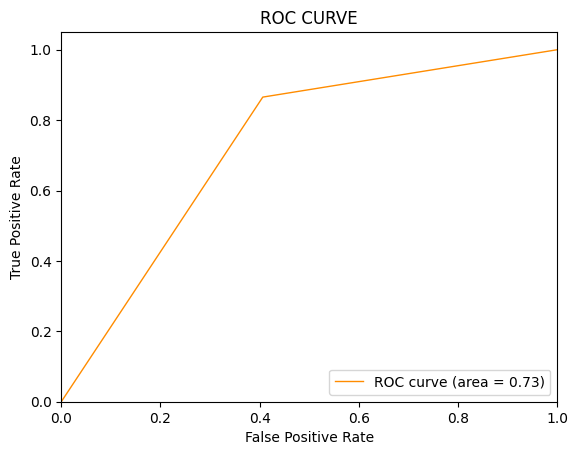

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
rf = clf.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.75      0.59      0.66       557
           1       0.75      0.86      0.80       798

    accuracy                           0.75      1355
   macro avg       0.75      0.73      0.73      1355
weighted avg       0.75      0.75      0.74      1355



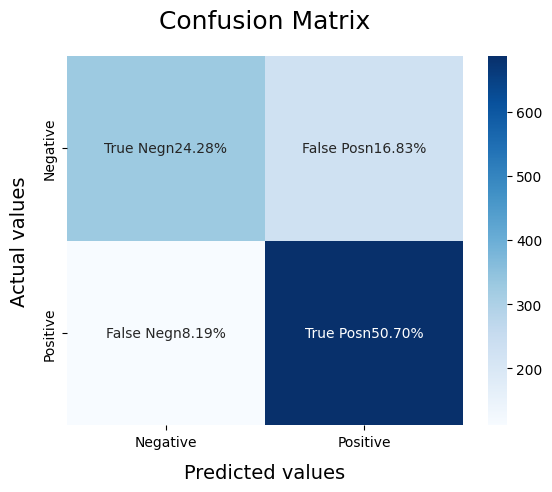

In [ ]:
model_Evaluate(rf)
y_pred4 = rf.predict(X_test)
from sklearn.metrics import f1_score
#f1_score(y_pred,)

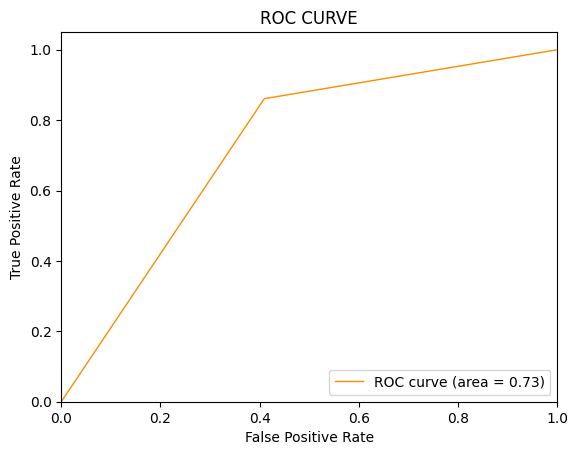

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()